In [1]:
import gym
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
env = gym.make('Taxi-v3')
print(env.action_space)
print(env.observation_space)

Discrete(6)
Discrete(500)


In [3]:
# Some actions to play around with the environment
env.seed(12)
print(env.reset())
env.render()
env.step(1)
env.step(1)
env.step(2)
env.step(2)
env.step(2)
env.step(2)
env.step(1)
env.step(1)
print(env.step(4))
print(env.step(0))
env.step(0)
print(env.step(0))
print(env.step(0))
env.render()
env.step(3)
print(env.step(5))
env.render()



206
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

(26, -10, False, {'prob': 1.0})
(126, -1, False, {'prob': 1.0})
(326, -1, False, {'prob': 1.0})
(426, -1, False, {'prob': 1.0})
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
(426, -10, False, {'prob': 1.0})
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


# Some random-run statistics

To get an idea of how our initial random system behaves, we'll take a look at the number of steps in each episode, and the acrued reward, over 5000 steps.

In [4]:
env.seed(11)
print(env.reset())

epi = 0 # episode counter
g = [0] # reward in each episode
its = [0] # number of iterations in each episode

for _ in range(5000):
    s, r, d, info = env.step(env.action_space.sample())#env.action_space.sample())
    g[epi] += r
    its[epi] += 1
    
    if d == True:
        print("Reset: s = {0}, r = {1}, its = {2}.".format(s, r, its[epi]))
        env.reset()
        epi += 1
        g.append(0)
        its.append(0)
env.close()

print("Total number of iterations per episode: {0}".format(its))
print("Total reward per episode: {0}".format(g))

243
Reset: s = 419, r = -10, its = 200.
Reset: s = 162, r = -1, its = 200.
Reset: s = 152, r = -1, its = 200.
Reset: s = 3, r = -1, its = 200.
Reset: s = 72, r = -10, its = 200.
Reset: s = 384, r = -10, its = 200.
Reset: s = 189, r = -1, its = 200.
Reset: s = 304, r = -10, its = 200.
Reset: s = 231, r = -10, its = 200.
Reset: s = 54, r = -1, its = 200.
Reset: s = 73, r = -10, its = 200.
Reset: s = 119, r = -10, its = 200.
Reset: s = 403, r = -1, its = 200.
Reset: s = 0, r = 20, its = 108.
Reset: s = 483, r = -10, its = 200.
Reset: s = 401, r = -1, its = 200.
Reset: s = 158, r = -1, its = 200.
Reset: s = 126, r = -10, its = 200.
Reset: s = 171, r = -1, its = 200.
Reset: s = 0, r = 20, its = 154.
Reset: s = 382, r = -1, its = 200.
Reset: s = 214, r = -1, its = 200.
Reset: s = 151, r = -10, its = 200.
Reset: s = 475, r = 20, its = 163.
Reset: s = 376, r = -10, its = 200.
Total number of iterations per episode: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 108, 200, 200

# Q-learning

Note that the cap on the num_its is 200. This may make it hard.

Guess on behavior: first, illegal dropoffs will be learned to be avoided, over episodes. Then, when a positive pickup is encountered, this will be reinforced enough so that it will always occur. In Sarsa-TD, deep neagtive reward could potentially be propagated back. 

In [61]:
#Q_Q = np.zeros((env.observation_space.n, env.action_space.n))
Q_Q = -100. * np.ones((env.observation_space.n, env.action_space.n))
alpha_Q = .1
eps_Q = .1

reward_Q = [] # List of total reward for each episode.
num_its_Q = [] # Lis of total number of iterations in each episode.
epis_Q = 0 # Counter of the number of episodes.
env.seed(11)

[11]

In [62]:
num_epis_Q = 10000 # Number of episodes to train Q-function

In [63]:
for _ in range(num_epis_Q):
    reward_Q.append(0)
    num_its_Q.append(0)
    s = env.reset()
    a = env.action_space.sample()
    for i in range(200):
        s_n, r, done, _ = env.step(a) # Sample new state, with action a.
        Q_Q[s,a] = Q_Q[s,a] + alpha_Q * (r + np.max(Q_Q[s_n, :]) - Q_Q[s,a]) # Q-update
        reward_Q[epis_Q] += r
        num_its_Q[epis_Q] += 1

        s = s_n
        # epsilon-greedy sampling of new action:
        if np.random.uniform() < eps_Q:
            a = env.action_space.sample()
        else: 
            a = np.argmax(Q_Q[s, :])

        if done:
            break
    epis_Q += 1

(-100, 0)

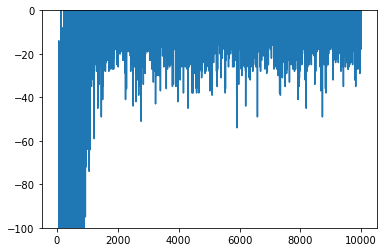

In [64]:
plt.plot(reward_Q)
axes = plt.gca()
axes.set_ylim([-100, 0])

In [15]:
num_its_Q[epis_Q - 20:]

[19,
 15,
 18,
 16,
 13,
 13,
 14,
 12,
 17,
 13,
 9,
 16,
 19,
 18,
 12,
 17,
 21,
 12,
 15,
 12,
 0]

Let's see how it performs:

In [17]:
d = False
s = env.reset()
while not d:
    s, r, d, _ = env.step(np.argmax(Q_Q[s, :]))
    env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y

Let's think for a moment through this algorithm. Due to reducibility of the MDP, suppose we always start with the same pick-up and drop-off positions.

So the algorithm rolls: on the first run, every time it does an illegal pickup dropoff, it gets a very negative reward and backs this up. When it takes another action, it gets a smaller negative Q-update. Thus, everytime it chooses a new exploitative action, the algorithm will choose ones that it hasn't tried before. So it quickly learns not to do illegal pick-ups or drop-offs. Then, we need to be lucky enough that in an episode where the algorithm randomly picks up the person, it lands on the drop off state, where if it ahs been there a couple of times, it'll choose the drop-off action if exploiting. Then, jackpot! High reward! (Can we check this: that there is no feedback for good pickup?)

### Q initialization

Note that in this description, the Q-initialization mattered. If it were much more negative than -10, then it will always try to choose the same negative actions untill enough exploration has taken place.

**Update:** Actually not the case, because Q-value gets backed up wrt next Q-value, cancelling the translations out. Only relative difference between the state-action values differ. Choose different types of random inits?


### Reward signal

Also, note the problem engineering choices: Here, we have taken the reward signal as given. The choice does influence the learning however.

Cool, Q-learning works quite quick on this example. Let's compare it to some of its friends.

Some stuff to try: 
- vary alpha
- vary eps
- Compare over different seeds (although less relevant here due to limited stochasticity)
- Check variance
- Computational time

Compare **overall** performace to other algorithms, in terms of average reward and learning speed.

# Sarsa-TD(0)

In [25]:
Q_TD = np.zeros((env.observation_space.n, env.action_space.n))
alpha_TD = .1
eps_TD = .1

reward_TD = [] # List of total reward for each episode.
num_its_TD = [] # Lis of total number of iterations in each episode.
epis_TD = 0 # Counter of the number of episodes.
env.seed(11)


In [26]:
num_epis_TD = 10000

In [27]:
for _ in range(num_epis_TD):
    reward_TD.append(0)
    num_its_TD.append(0)
    s = env.reset()
    a = env.action_space.sample()
    for i in range(200):
        s_n, r, done, _ = env.step(a) # Sample new state, with action a.
        # epsilon-greedy sampling of new action:
        if np.random.uniform() < eps_TD:
            a_n = env.action_space.sample()
        else: 
            a_n = np.argmax(Q_TD[s_n, :])
        
        
        Q_TD[s,a] = Q_TD[s,a] + alpha_TD * (r + Q_TD[s_n, a_n] - Q_TD[s,a]) # Q-update
        reward_TD[epis_TD] += r
        num_its_TD[epis_TD] += 1

        s = s_n
        a = a_n

        if done:
            break
    epis_TD += 1

(-100, 0)

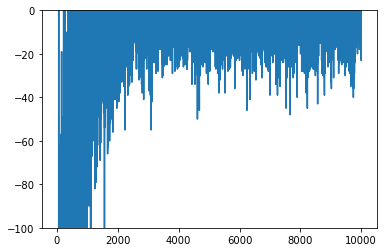

In [28]:
plt.plot(reward_TD)
axes = plt.gca()
axes.set_ylim([-100, 0])

Sarsa-TD seems to learn much slower. Just because of eps% chance of comparing of backing up value wrt a random action.

**TODO:** Check literature on a comparison.

# Sarsa - TD(lambda), backward view

Note that this algorithm is more computationally costly. Note that it takes more time to run.

In [53]:
Q_l = np.zeros((env.observation_space.n, env.action_space.n))
alpha_l = .1
eps_l = .1
lambda_l= .8 # Lambda parameter

reward_l = [] # List of total reward for each episode.
num_its_l = [] # Lis of total number of iterations in each episode.
epis_l = 0 # Counter of the number of episodes.
env.seed(11)


[11]

In [54]:
num_epis_l = 2000 # Let's run it for less time. It's computationally intensive (about 2500 times more costly per step)

In [55]:
for _ in range(num_epis_l):
    E_l = np.zeros((env.observation_space.n, env.action_space.n)) # Eligibility trace
    reward_l.append(0)
    num_its_l.append(0)
    s = env.reset()
    a = env.action_space.sample()
    for i in range(200):
        s_n, r, done, _ = env.step(a) # Sample new state, with action a.
        # epsilon-greedy sampling of new action:
        if np.random.uniform() < eps_l:
            a_n = env.action_space.sample()
        else: 
            a_n = np.argmax(Q_l[s_n, :])
        
        # Spike in trace
        E_l[s_n, a_n] += 1
        
        # Q-update
        Q_l = Q_l + alpha_l * E_l * (r + Q_l[s_n, a_n] - Q_l[s,a]) 
        
        # Eligibilit trace update
        E_l = lambda_l * E_l
        
        # Reward-update
        reward_l[epis_l] += r
        num_its_l[epis_l] += 1

        s = s_n
        a = a_n

        if done:
            break
    epis_l += 1

(-100, 0)

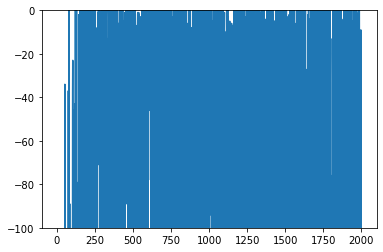

In [56]:
plt.plot(reward_l)
axes = plt.gca()
axes.set_ylim([-100, 0])

In [37]:
T = np.ones((5,6))

In [38]:
T * 3

array([[3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3.]])